In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
class Accumulator():
    def __init__(self,n):
        self.data=[0.0]*n
    def add(self,input_data):
      self.data=[a+float(b)  for a,b in zip(self.data,input_data)]
        
    def reset(self):
        self.data=[0.0]*len(self.data)
        
    def __getitem__(self, index):
        return self.data[index]
    
def accuracy(output, target):
    """ 计算预测正确的数量 """
    if len(output) != len(target):
        return torch.argmax(output,dim=1).eq(target).float().sum()
    else:
        return output.eq(target).float().sum()
    
    
def evaluate_accuracy(net, data_loader):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        out=net.forward(inputs)
        acc=accuracy(out,targets)
        metric.add(acc,targets.numel())
    return metric[0]/metric[1]


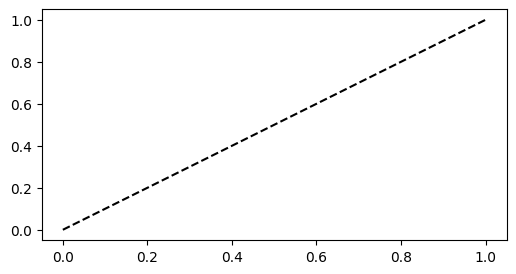

In [13]:
plt.figure(figsize=(6,3))
plt.plot([0,1],[0,1], linestyle='--',color='black')

In [17]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])